In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_india.csv to covid_19_india.csv


In [ ]:
import pandas as pd
dataset = pd.read_csv('covid_19_india.csv')
dataset.head()

Sno        Date     Time  ... Cured Deaths Confirmed
0    1  2020-01-30  6:00 PM  ...     0      0         1
1    2  2020-01-31  6:00 PM  ...     0      0         1
2    3  2020-02-01  6:00 PM  ...     0      0         2
3    4  2020-02-02  6:00 PM  ...     0      0         3
4    5  2020-02-03  6:00 PM  ...     0      0         3

[5 rows x 9 columns]

In [ ]:
#lets convert the Date feature to Date&time datatype
dataset['Date']=pd.to_datetime(dataset['Date'],format='%Y-%m-%d')

#Time is not required as it doesnt make much difference
dataset.drop(['Time'],axis=1, inplace=True)

#Renaming State/UnionTerritory to States for easy reference
dataset.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [ ]:
dataset['Active_cases']=dataset['Confirmed']-(dataset['Cured']+dataset['Deaths'])

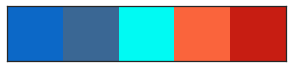

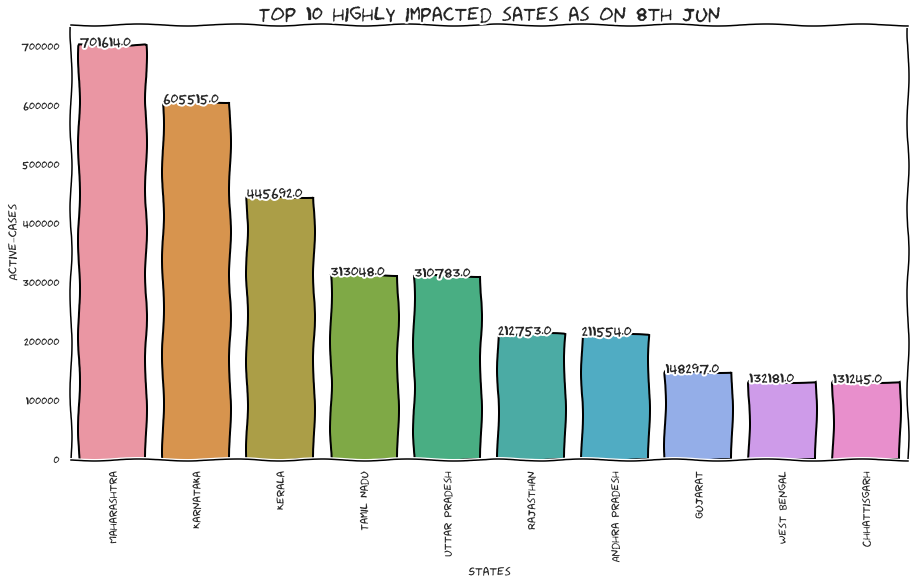

In [ ]:
import seaborn as sns
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

top_10=dataset.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 highly impacted sates as on 8th jun", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Active_cases',x='States', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

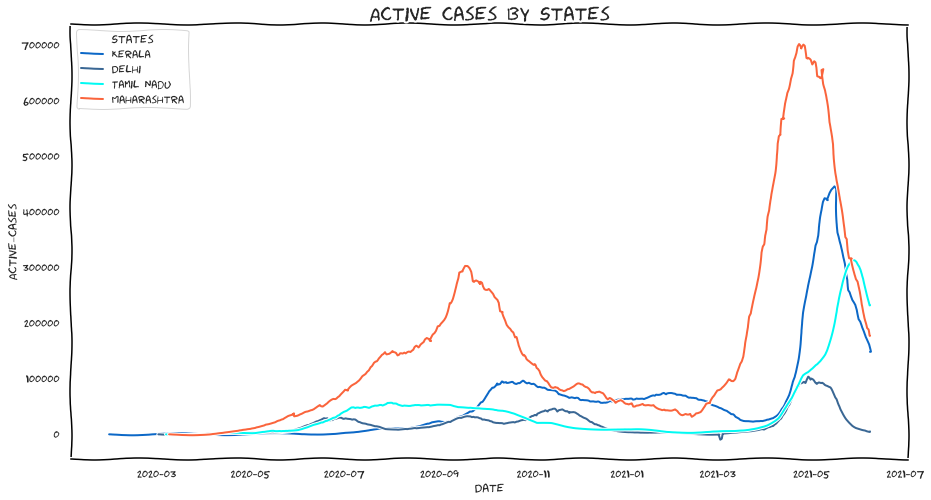

In [ ]:
fig=plt.figure(figsize=(15,8))
with plt.xkcd():
    ax=sns.lineplot(data=dataset[dataset['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Date',y='Active_cases',hue='States')
    ax.set_title("Active cases by States", size=20)

IndexError: ignored

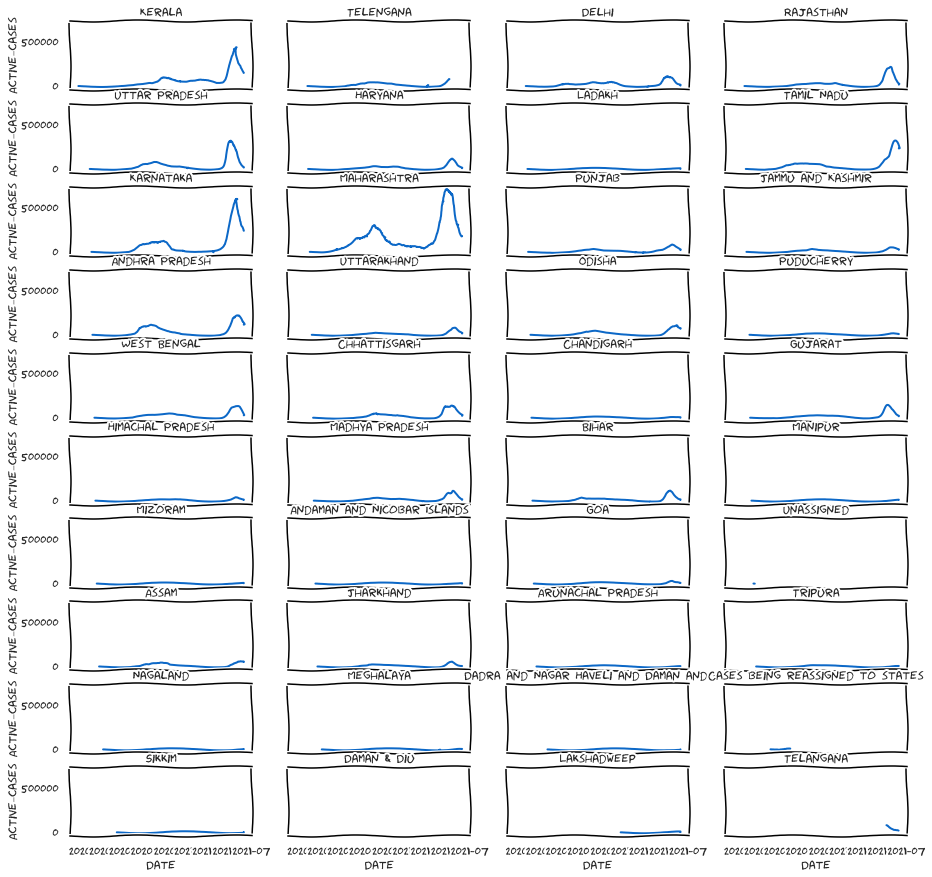

In [ ]:
with plt.xkcd():
    fig, ax=plt.subplots(nrows=10, ncols=4, figsize=[15,15], sharex=True, sharey=True)
    ax=ax.flatten()
    for i,s in enumerate(dataset['States'].unique()):
        data1=dataset[dataset['States']==s][['Date','Active_cases']]
        sns.lineplot(data=data1, x='Date',y='Active_cases', ax=ax[i])
        ax[i].set_title(s)

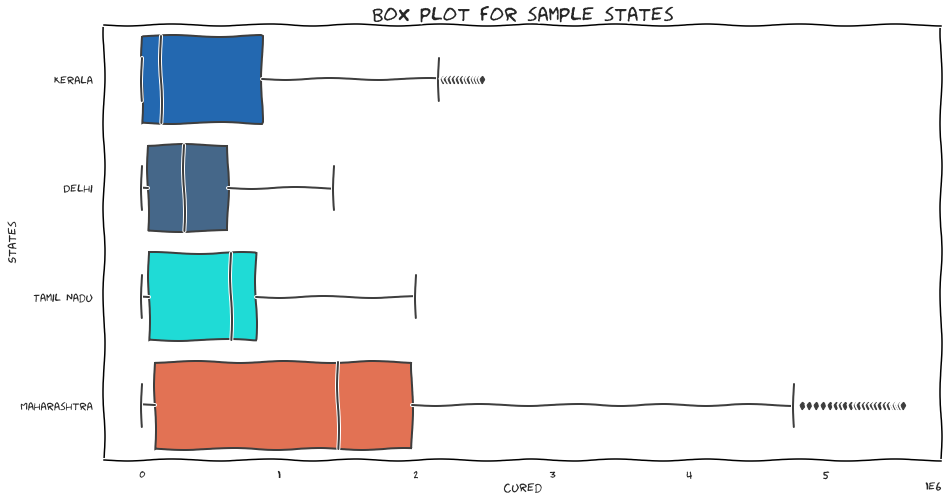

In [ ]:
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    sns.boxplot(data=dataset[dataset['States'].isin(['Kerala','Tamil Nadu','Delhi','Maharashtra'])],x='Cured',y='States')
    plt.title("Box plot for sample states" ,size=20)

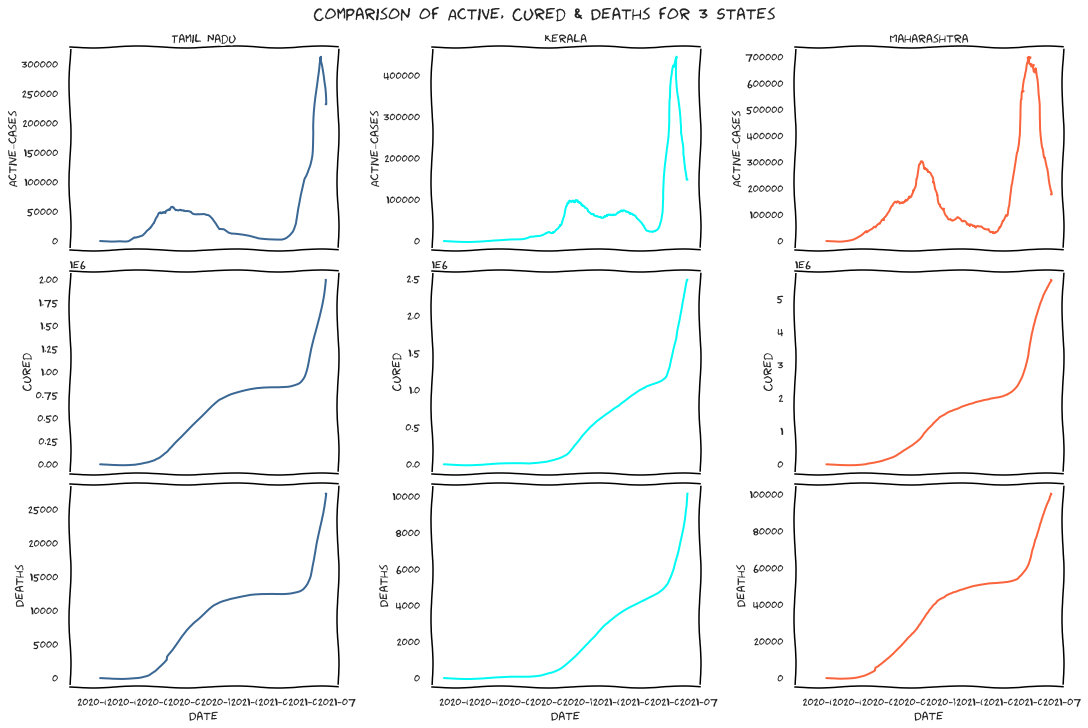

In [ ]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra']
tn=dataset[dataset['States']=='Tamil Nadu']
kl=dataset[dataset['States']=='Kerala']
mh=dataset[dataset['States']=='Maharashtra']

with plt.xkcd():

    fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(15,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
    plt.suptitle("Comparison of Active, Cured & Deaths for 3 States")
    sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
    ax[0,0].set_title("Tamil Nadu")
    sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
    sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

    sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
    ax[0,1].set_title("Kerala")
    sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
    sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

    sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
    ax[0,2].set_title("Maharashtra")
    sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
    sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])


In [ ]:

import pycountry
import plotly.express as px
import pandas as pd
# ----------- Step 1 ------------
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)
# print(df1.head) # Uncomment to see what the dataframe is like
# ----------- Step 2 ------------
list_countries = df1['Country'].unique().tolist()
# print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# print(d_country_code) # Uncomment to check dictionary  

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

# print(df1.head)  # Uncomment to confirm that ISO codes added
# ----------- Step 3 ------------
fig = px.choropleth(data_frame = df1,
                    locations= "iso_alpha",
                    color= "Confirmed",  # value in column 'Confirmed' determines color
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',  #  color scale red, yellow green
                    animation_frame= "Date")

fig.show()

could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Congo (Brazzaville)
could not add ISO 3 code for -> Congo (Kinshasa)
could not add ISO 3 code for -> Diamond Princess
could not add ISO 3 code for -> Korea, South
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> MS Zaandam
could not add ISO 3 code for -> Summer Olympics 2020
could not add ISO 3 code for -> Taiwan*
could not add ISO 3 code for -> West Bank and Gaza


In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1MB 8.4MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=ebf4dbcff9896599d83e81f150e9a3284d4bb92268dbbe96e68bfdf816c8b78d
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

In [29]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
# latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-13-2021.csv')


In [30]:
confirmed_df.head()

Province/State Country/Region       Lat  ...  6/25/21  6/26/21  6/27/21
0            NaN    Afghanistan  33.93911  ...   111592   111592   111592
1            NaN        Albania  41.15330  ...   132506   132509   132512
2            NaN        Algeria  28.03390  ...   137772   138113   138465
3            NaN        Andorra  42.50630  ...    13882    13882    13882
4            NaN         Angola -11.20270  ...    38371    38528    38556

[5 rows x 527 columns]

In [31]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [32]:
confirmed.head()

1/22/20  1/23/20  1/24/20  1/25/20  ...  6/24/21  6/25/21  6/26/21  6/27/21
0        0        0        0        0  ...   109532   111592   111592   111592
1        0        0        0        0  ...   132499   132506   132509   132512
2        0        0        0        0  ...   137403   137772   138113   138465
3        0        0        0        0  ...    13877    13882    13882    13882
4        0        0        0        0  ...    38091    38371    38528    38556

[5 rows x 523 columns]

In [33]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

In [34]:
import numpy as np
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)



In [35]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [36]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [37]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [38]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.03, shuffle=False)

In [39]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 32070233.25100555
MSE: 1040724900757339.9


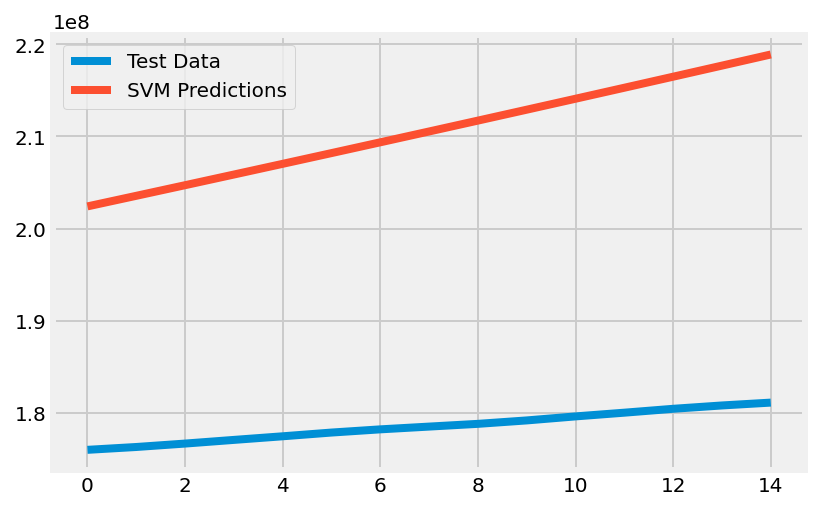

In [40]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [47]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)


In [48]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
# polynomial regression
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))



MAE: 667669.4409308136
MSE: 641261858760.7045


In [49]:
print(linear_model.coef_)

[[ 1.61510167e+06 -1.44756451e+04 -7.53624984e+01  3.83000328e+00
  -4.52275548e-03]]


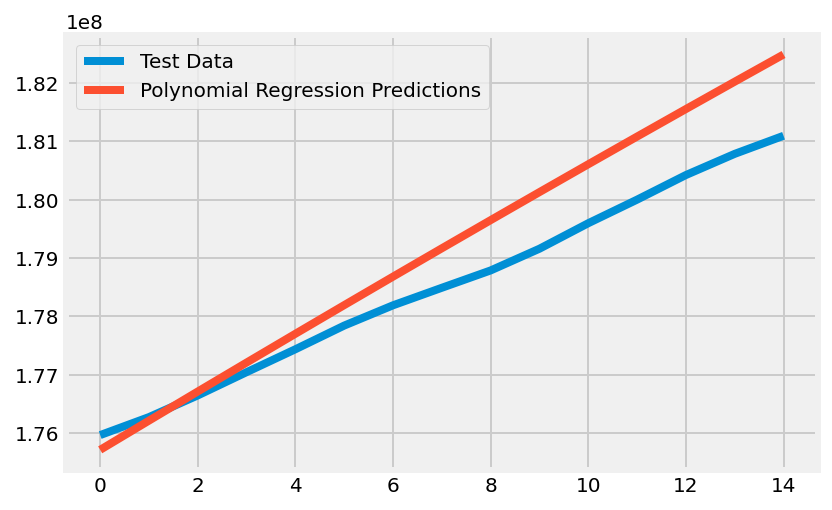

In [50]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])